In [140]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
#load cleaned dataset
data = pd.read_csv("data_cleaned.csv")

#check dataset
data.head()

,backers_count,blurb,country,created_at,deadline,id,launched_at,name,spotlight,staff_pick,state,state_changed_at,usd_pledged,sub_category,parent_category,goal_usd,name_count,blurb_count
0,148,an optical illusion temporary tattoo point you...,US,2016-03-13 23:31:32,2016-04-06 02:00:00,888748006,2016-03-17 22:24:43,memento mori tattoo,True,True,successful,2016-04-06 02:00:00,1457.01,Interactive Design,Design,100.0,3,16
1,57,a childrens book in full color it is written ...,US,2020-01-23 11:30:03,2020-07-01 12:07:40,1635691370,2020-06-01 12:07:40,the hero,True,False,successful,2020-07-01 12:07:40,5627.00,Illustration,Art,5000.0,2,13
2,51,help lauren elens bring a new orleansstyle sno...,US,2017-05-09 18:56:26,2017-06-08 20:14:13,887441191,2017-05-09 20:14:13,sara lous new orleans style snoballs,True,False,successful,2017-06-08 20:14:15,5050.00,Food Trucks,Food,5000.0,6,14
3,44,im a taco cart brought out of mexico the human...,US,2016-08-22 16:30:07,2017-04-22 18:36:25,1015963105,2017-03-23 18:36:25,colorocko taco,True,False,successful,2017-04-22 18:36:25,5580.00,Food Trucks,Food,5000.0,2,26
4,19,a full length concert video of team 4 of the 2...,US,2019-08-01 17:06:23,2019-08-08 20:15:23,1328231502,2019-08-01 20:15:23,school of rock allstars team 4 concert video,True,False,successful,2019-08-08 20:15:23,610.00,Rock,Music,500.0,8,24


In [114]:
data.describe()

,backers_count,id,usd_pledged,goal_usd,name_count,blurb_count
count,189334.000000,1.893340e+05,1.893340e+05,1.893340e+05,189334.000000,189334.000000
mean,148.259927,1.073043e+09,1.442466e+04,3.586746e+04,5.667540,17.828842
std,952.671517,6.190382e+08,1.424400e+05,9.652684e+05,2.680002,5.621795
min,0.000000,1.852000e+04,0.000000e+00,1.000000e-02,1.000000,1.000000
25%,4.000000,5.369004e+08,1.365728e+02,1.500000e+03,4.000000,14.000000
50%,29.000000,1.071587e+09,1.751000e+03,4.900000e+03,5.000000,19.000000
75%,95.000000,1.608840e+09,7.210097e+03,1.200000e+04,8.000000,22.000000
max,185341.000000,2.147476e+09,4.175415e+07,1.182690e+08,27.000000,43.000000


In [4]:
#check ratio of successful to failed projects
data['state'].value_counts()

successful    112659
failed         76675
Name: state, dtype: int64

In [6]:
#compute percentage of each project status
percent_success = (data['state'].value_counts()[0]/data.shape[0]) * 100
percent_fail = (data['state'].value_counts()[1]/data.shape[0]) * 100

print(f"{round(percent_success,2)}% of projects were successful")
print(f"{round(percent_fail, 2)}% of projects failed")

59.5% of projects were successful
40.5% of projects failed


In [103]:
#define a function to plot distribution of data by each feature (column)
def data_dist(df, column_name, plot_title, xlabel):
    '''This function takes a dataframe, column name (feature), plot title and label of x_axis as inputs and outputs
    a bar plot showing the distribution of the data by the input feature'''
    
    column_value_counts = df.groupby(column_name)['id'].count()
    #column_value_counts = df[column_name].value_counts()
    data.groupby('state')['id'].count()
    plt.figure(figsize=(10,7))
    plt.title(plot_title)
    sns.barplot(x= column_value_counts.index, y=column_value_counts.values)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    if column_name == 'parent_category':
        plt.xticks(rotation=45)
    plt.show()

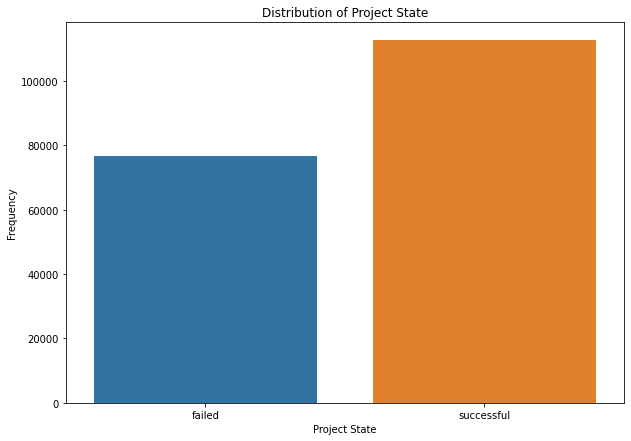

In [158]:
#plot distribution of data for each class -- 
data_dist(data, 'state', 'Distribution of Project State', 'Project State')

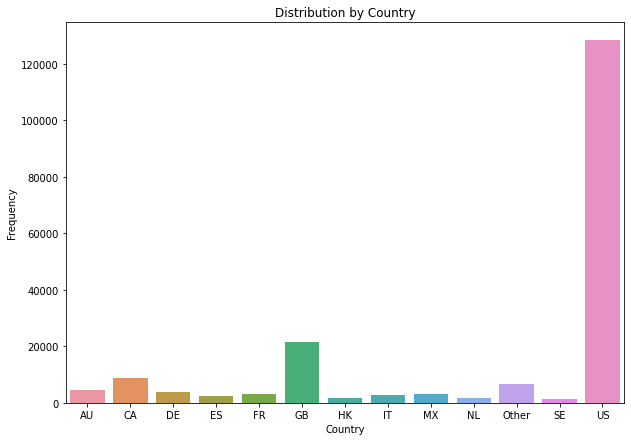

In [105]:
#plot distribution of data by country
data_dist(data, 'country', 'Distribution by Country', 'Country')

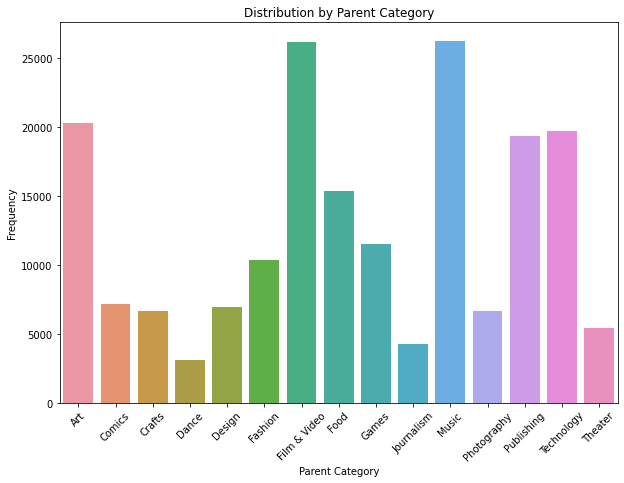

In [106]:
#plot distribution of data by parent_category
data_dist(data, 'parent_category', 'Distribution by Parent Category', 'Parent Category')

In [148]:
#define a function to plot the data distribution by project state
def plot_grouped_barchart(df, column_name, plot_title, xlabel):
    grouped_data = df.groupby([column_name, 'state'])['state'].count().sort_index(ascending=False)
    
    grouped_data.unstack().plot(kind='bar')
    plt.rcParams["figure.figsize"] = (10,7)
    plt.title(plot_title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    if column_name == 'parent_category' or column_name == 'year':
        plt.xticks(rotation=45)
    if column_name == 'staff_pick':
        plt.xticks(rotation='horizontal')
    plt.show()

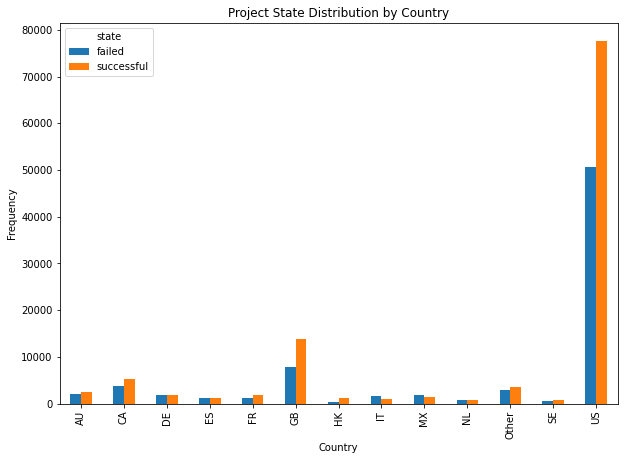

In [157]:
#plot grouped bar chart by country
plot_grouped_barchart(data, 'country', 'Project State Distribution by Country', 'Country')

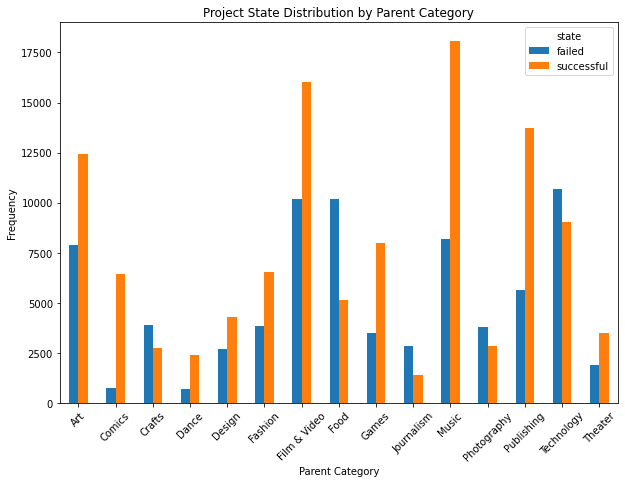

In [156]:
#plot grouped bar chart by parent category
plot_grouped_barchart(data, 'parent_category', 'Project State Distribution by Parent Category', 'Parent Category')

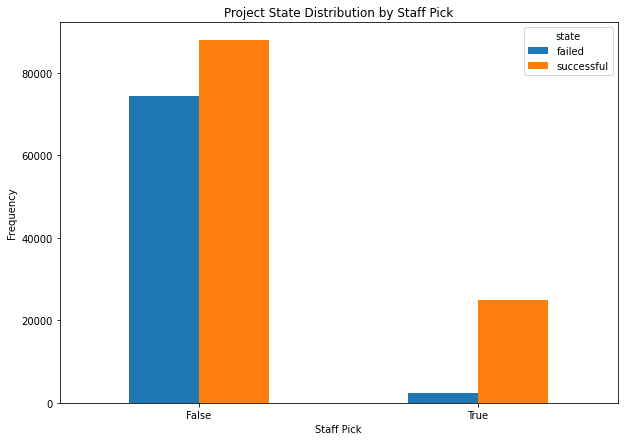

In [155]:
#plot grouped bar chart by staff pick
plot_grouped_barchart(data, 'staff_pick', 'Project State Distribution by Staff Pick', 'Staff Pick')

In [137]:
#define a function to make violin plot to explore distribution of continuous features (goal_usd, name_count, blurb_count
def violin_plot(df, column_name, plot_title, ylabel):
    '''This function takes a dataframe as input and returns a violin plot of a specified continuous feature (column_name) with 
    specified input plot title and ylabel'''
    sns.violinplot(x = 'state', y=column_name, data=df, order=['failed', 'successful'])
    plt.title(plot_title)
    plt.ylabel(ylabel)
    plt.show()

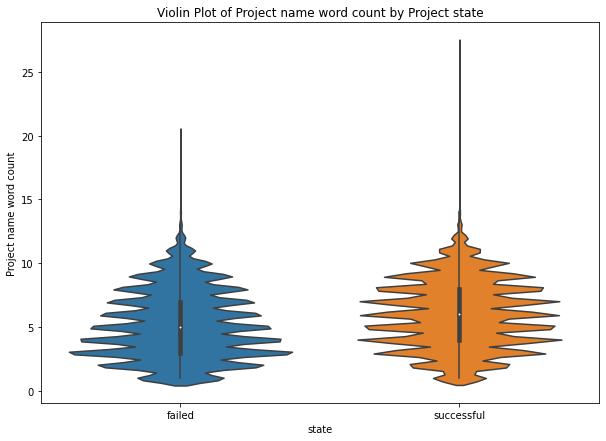

In [154]:
violin_plot(data, 'name_count', 'Violin Plot of Project name word count by Project state', 'Project name word count')

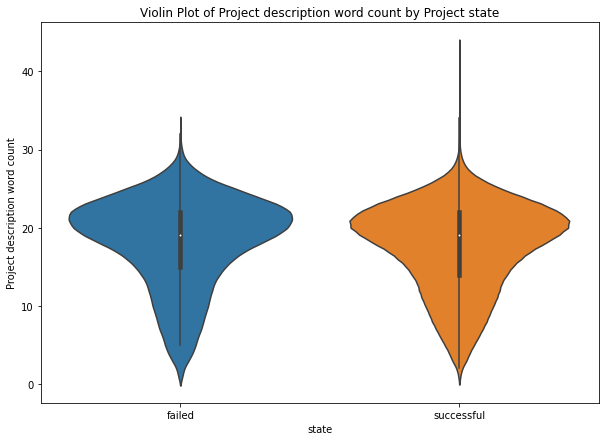

In [153]:
violin_plot(data, 'blurb_count', 'Violin Plot of Project description word count by Project state', 'Project description word count')

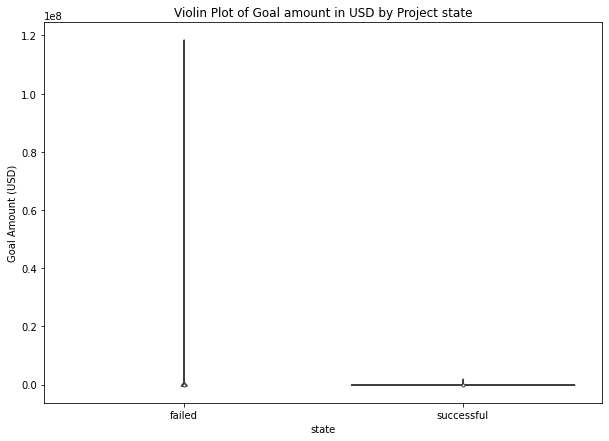

In [152]:
violin_plot(data, 'goal_usd', 'Violin Plot of Goal amount in USD by Project state', 'Goal Amount (USD)')

### Feature Engineering

In [159]:
data.head()

,backers_count,blurb,country,created_at,deadline,id,launched_at,name,spotlight,staff_pick,state,state_changed_at,usd_pledged,sub_category,parent_category,goal_usd,name_count,blurb_count,year
0,148,an optical illusion temporary tattoo point you...,US,2016-03-13 23:31:32,2016-04-06 02:00:00,888748006,2016-03-17 22:24:43,memento mori tattoo,True,True,successful,2016-04-06 02:00:00,1457.01,Interactive Design,Design,100.0,3,16,2016
1,57,a childrens book in full color it is written ...,US,2020-01-23 11:30:03,2020-07-01 12:07:40,1635691370,2020-06-01 12:07:40,the hero,True,False,successful,2020-07-01 12:07:40,5627.00,Illustration,Art,5000.0,2,13,2020
2,51,help lauren elens bring a new orleansstyle sno...,US,2017-05-09 18:56:26,2017-06-08 20:14:13,887441191,2017-05-09 20:14:13,sara lous new orleans style snoballs,True,False,successful,2017-06-08 20:14:15,5050.00,Food Trucks,Food,5000.0,6,14,2017
3,44,im a taco cart brought out of mexico the human...,US,2016-08-22 16:30:07,2017-04-22 18:36:25,1015963105,2017-03-23 18:36:25,colorocko taco,True,False,successful,2017-04-22 18:36:25,5580.00,Food Trucks,Food,5000.0,2,26,2016
4,19,a full length concert video of team 4 of the 2...,US,2019-08-01 17:06:23,2019-08-08 20:15:23,1328231502,2019-08-01 20:15:23,school of rock allstars team 4 concert video,True,False,successful,2019-08-08 20:15:23,610.00,Rock,Music,500.0,8,24,2019


In [145]:
#convert date columns to datetime type
 
data['created_at'] = pd.to_datetime(data['created_at'])

data['deadline'] = pd.to_datetime(data['deadline'])

data['launched_at'] = pd.to_datetime(data['launched_at'])

data['state_changed_at'] = pd.to_datetime(data['state_changed_at'])

In [146]:
#extract year of project using created_at column
data['year'] = data['created_at'].dt.year

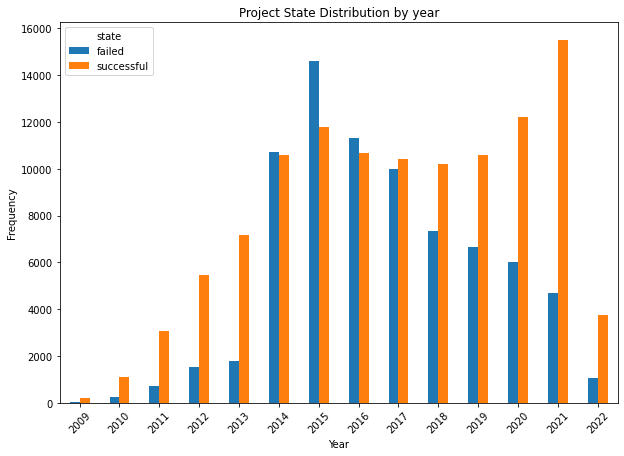

In [151]:
#plot project class distribution by year
plot_grouped_barchart(data, 'year', 'Project State Distribution by year', 'Year')

In [167]:
data['year'].value_counts().sort_index()

2009      219
2010     1335
2011     3786
2012     6971
2013     8955
2014    21285
2015    26388
2016    21993
2017    20423
2018    17534
2019    17232
2020    18251
2021    20182
2022     4780
Name: year, dtype: int64

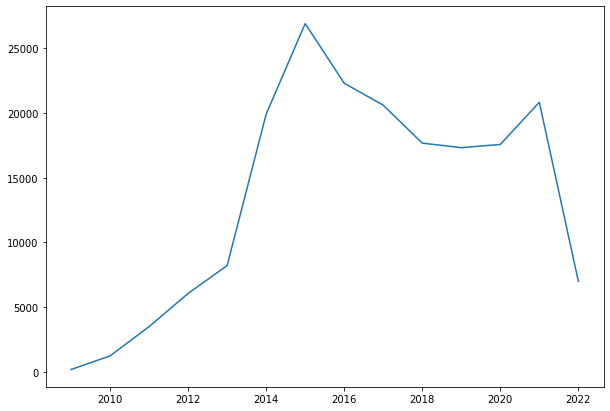

In [168]:
plt.plot(data['launched_at'].dt.year.value_counts().sort_index())

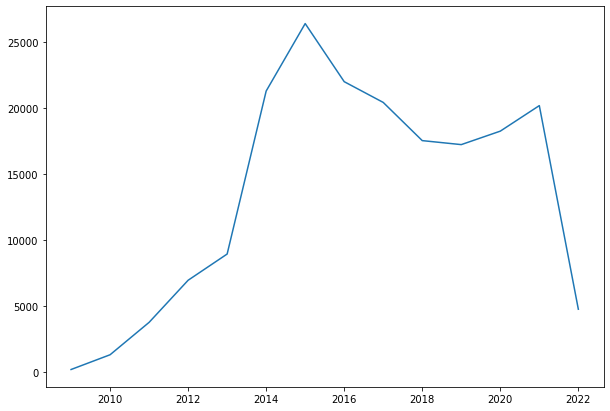

In [166]:
#plot data distribution by year
plt.plot(data['year'].value_counts().sort_index())

In [161]:
#compute prep_time in days -- duration between created_at and launched_at
data['prep_time'] = (data['launched_at'] - data['created_at']).dt.days

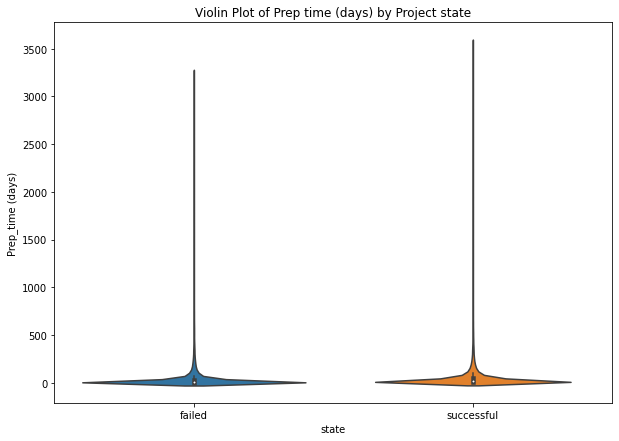

In [162]:
violin_plot(data, 'prep_time', 'Violin Plot of Prep time (days) by Project state', 'Prep_time (days)')

In [174]:
#compute campaign duration in days --duration between launched_at and deadline
data['cam_duration'] = (data['deadline'] - data['launched_at']).dt.days

In [175]:
data.columns

Index(['backers_count', 'blurb', 'country', 'created_at', 'deadline', 'id',
       'launched_at', 'name', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'usd_pledged', 'sub_category', 'parent_category',
       'goal_usd', 'name_count', 'blurb_count', 'year', 'prep_time',
       'cam_duration'],
      dtype='object')

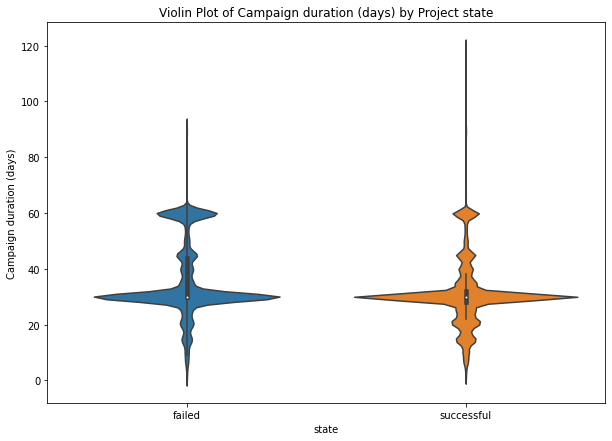

In [176]:
#Plot distribution of campaign duration
violin_plot(data, 'cam_duration', 'Violin Plot of Campaign duration (days) by Project state', 'Campaign duration (days)')

In [190]:
#Select metadata features to be used for modelling
df = data[['state','country', 'staff_pick', 'parent_category', 'goal_usd', 'name_count', 'blurb_count', 'prep_time', 
           'cam_duration']]

In [191]:
#check dataframe
df.head()

,state,country,staff_pick,parent_category,goal_usd,name_count,blurb_count,prep_time,cam_duration
0,successful,US,True,Design,100.0,3,16,3,19
1,successful,US,False,Art,5000.0,2,13,130,30
2,successful,US,False,Food,5000.0,6,14,0,30
3,successful,US,False,Food,5000.0,2,26,213,30
4,successful,US,False,Music,500.0,8,24,0,7


In [192]:
#convert target variable - state to numerical
df['state'].replace({'failed': 0, 'successful': 1}, inplace=True)

#check
df.state.unique()

/var/folders/s8/q17ghjw55fn1192037cmrkt00000gn/T/ipykernel_38018/1298687761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'].replace({'failed': 0, 'successful': 1}, inplace=True)


array([1, 0])

In [193]:
#convert categorical features to numerical --- get dummies
data_df = pd.get_dummies(df, columns=['country', 'staff_pick', 'parent_category'])

In [194]:
data_df.head()

,state,goal_usd,name_count,blurb_count,prep_time,cam_duration,country_AU,country_CA,country_DE,country_ES,...,parent_category_Fashion,parent_category_Film & Video,parent_category_Food,parent_category_Games,parent_category_Journalism,parent_category_Music,parent_category_Photography,parent_category_Publishing,parent_category_Technology,parent_category_Theater
0,1,100.0,3,16,3,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5000.0,2,13,130,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5000.0,6,14,0,30,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,5000.0,2,26,213,30,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,500.0,8,24,0,7,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#convert dataframe to csv
data_df.to_csv('